In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel

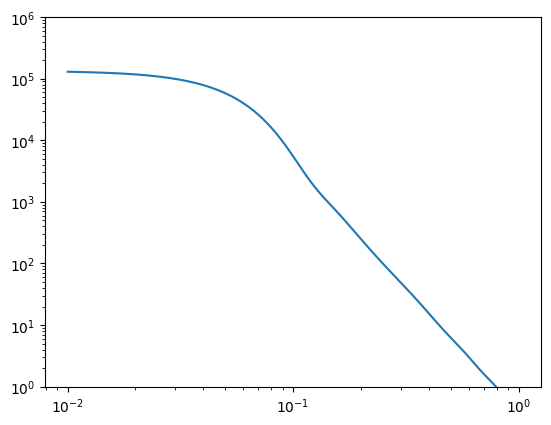

         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [2]:
# Spherical micelle in sasmodels
model = load_model("./models/spherical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
sphere_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40.0,
         'rg': 10.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0,
         'radius_core_pd':0.2, 'radius_core_pd_n':23, 'radius_core_pd_nsigma':3
         }
Iq = call_kernel(kernel, sphere_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()

In [10]:
%%prun -s cumulative
# Cylindrical micelle in sasmodels
model = load_model("./models/cylindrical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
cylinder_params = {
    'background':0.0,
    'scale':1.0,
    'v_core' : 4000.0,
    'v_corona' : 4000.0,
    'sld_solvent' : 1.0,
    'sld_core' : 2.0,
    'sld_corona' : 1.0,
    'radius_core': 40.0,
    'rg': 10.0,
    'length_core': 100.0,
    'd_penetration':1.0,
    'n_aggreg' : 67.0,
    }
Iq = call_kernel(kernel, cylinder_params)
# fig, ax = plt.subplots()
# ax.loglog(q, Iq)
# ax.set_ylim([1e0, 1e6])
# plt.show()

         24465085 function calls (23263273 primitive calls) in 16.585 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.000    0.000   16.585   16.585 {built-in method builtins.exec}
        1    0.000    0.000   16.585   16.585 <string>:1(<module>)
        1    0.000    0.000   16.581   16.581 direct_model.py:43(call_kernel)
        1    0.000    0.000   16.581   16.581 kernel.py:93(Iq)
        1    0.000    0.000   16.581   16.581 kernel.py:114(Fq)
        1    0.000    0.000   16.581   16.581 kernelpy.py:181(_call_kernel)
        1    0.000    0.000   16.581   16.581 kernelpy.py:202(_loops)
        1    0.000    0.000   16.581   16.581 kernelpy.py:167(<lambda>)
        1    0.000    0.000   16.581   16.581 kernelpy.py:304(vector_Iq)
        1    0.001    0.001   16.581   16.581 kernelpy.py:308(<listcomp>)
      200    0.008    0.000   16.580    0.083 cylindrical_micelle.py:76(Iq)
      600    0.002    0.00

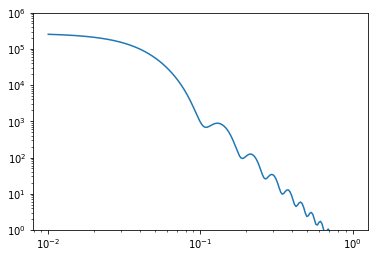

In [24]:
# Ellipsoidal micelle in sasmodels
model = load_model("./models/ellipsoidal_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
ellipsoid_params = {'v_core' : 4000.0,
         'v_corona' : 4000.0,
         'sld_solvent' : 1.0,
         'sld_core' : 2.0,
         'sld_corona' : 1.0,
         'radius_core': 40,
         'rg': 10,
         'eps': 2.0,
         'd_penetration':1.0,
         'n_aggreg' : 67.0
         }
Iq = call_kernel(kernel, ellipsoid_params)
fig, ax = plt.subplots()
ax.loglog(q, Iq)
ax.set_ylim([1e0, 1e6])
plt.show()